# **SOLUTION GUIDE: End-to-End Machine Learning Project (California Housing Dataset)**

**Objective**

To perform a **complete machine learning workflow** — from data exploration to model evaluation — using the ***California Housing dataset.***

# **Step 1: Import Libraries**

In [26]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML tools
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #added model
from sklearn.neighbors import KNeighborsRegressor #added model
from sklearn.metrics import mean_squared_error, r2_score


# **Step 2: Load the Dataset**

In [27]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print("Shape:", df.shape)
df.head(10)

Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


# **Step 3: Explore and Understand Data**

In [28]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


# **Step 4: Data Visualization**

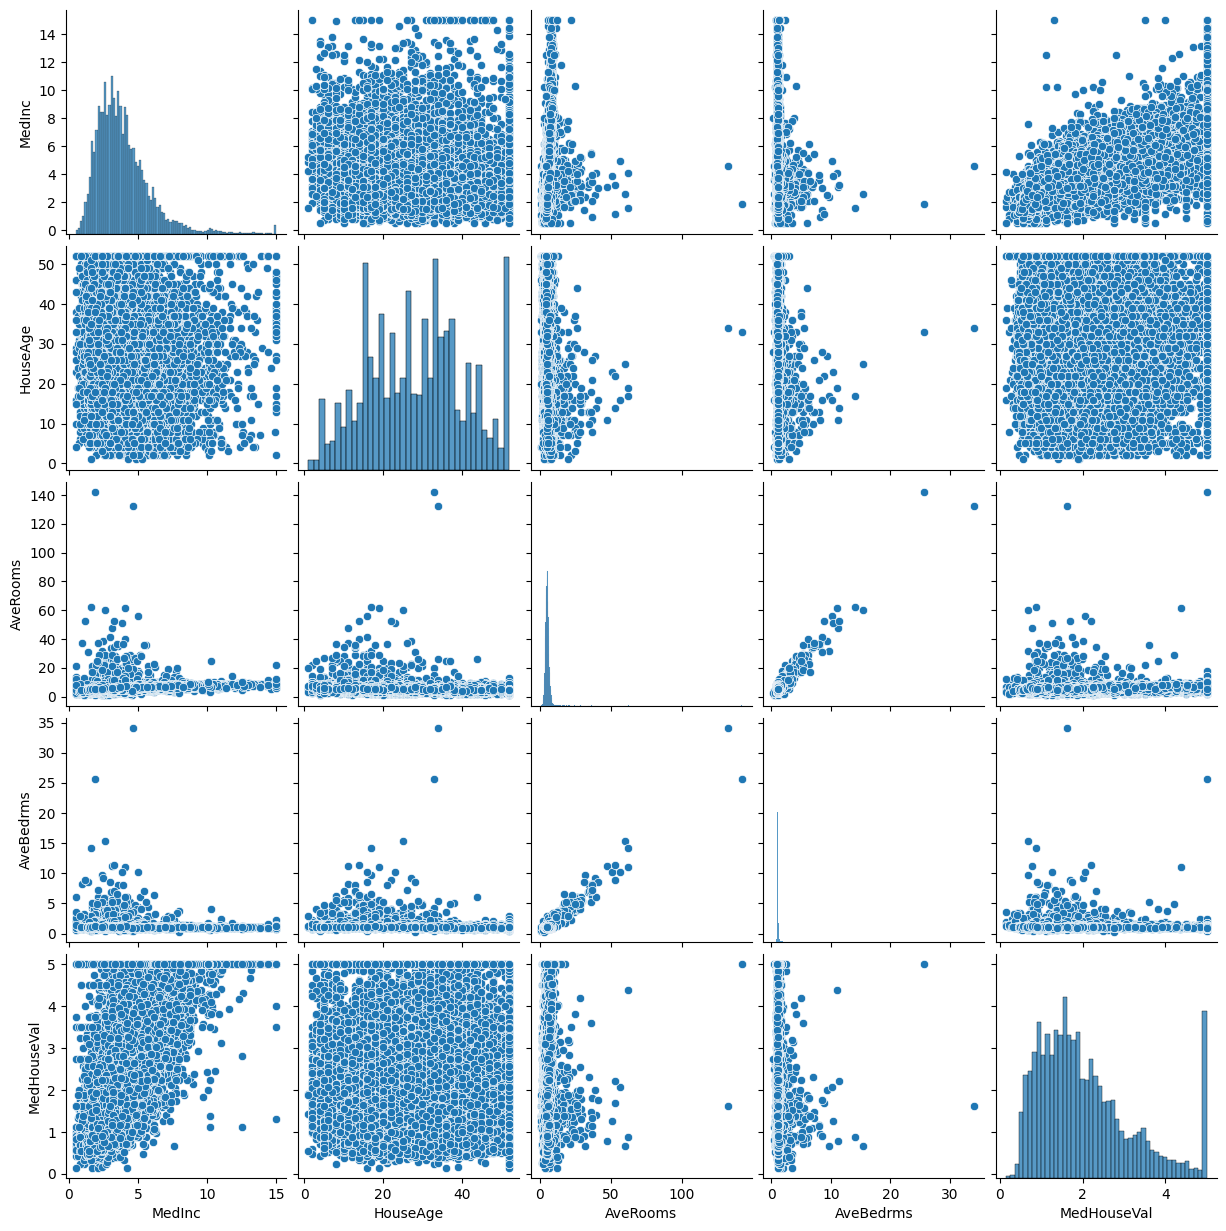

In [29]:
import seaborn as sns
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']])
plt.show()

# **Step 5: Prepare the Data**

In [30]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Step 6: Train Models**

**a. Linear Regression**

In [31]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

**b. Decision Tree Regressor**

In [32]:
tree = DecisionTreeRegressor(max_depth=8, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


**c. Random Forest Regressor**

In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**d. K-Nearest Neighbor Regressor**

In [34]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# **Step 7: Evaluate Models**

In [35]:
# Define the function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, "Decision Tree Regressor")

#Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

#Evaluate K-Nearest Neighbors Regressor
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")


Linear Regression Performance:
RMSE: 0.7456
R² Score: 0.5758

Decision Tree Regressor Performance:
RMSE: 0.6497
R² Score: 0.6779

Random Forest Regressor Performance:
RMSE: 0.5053
R² Score: 0.8051

K-Nearest Neighbors Regressor Performance:
RMSE: 0.6576
R² Score: 0.6700



# **Step 8: Visualize Predictions**

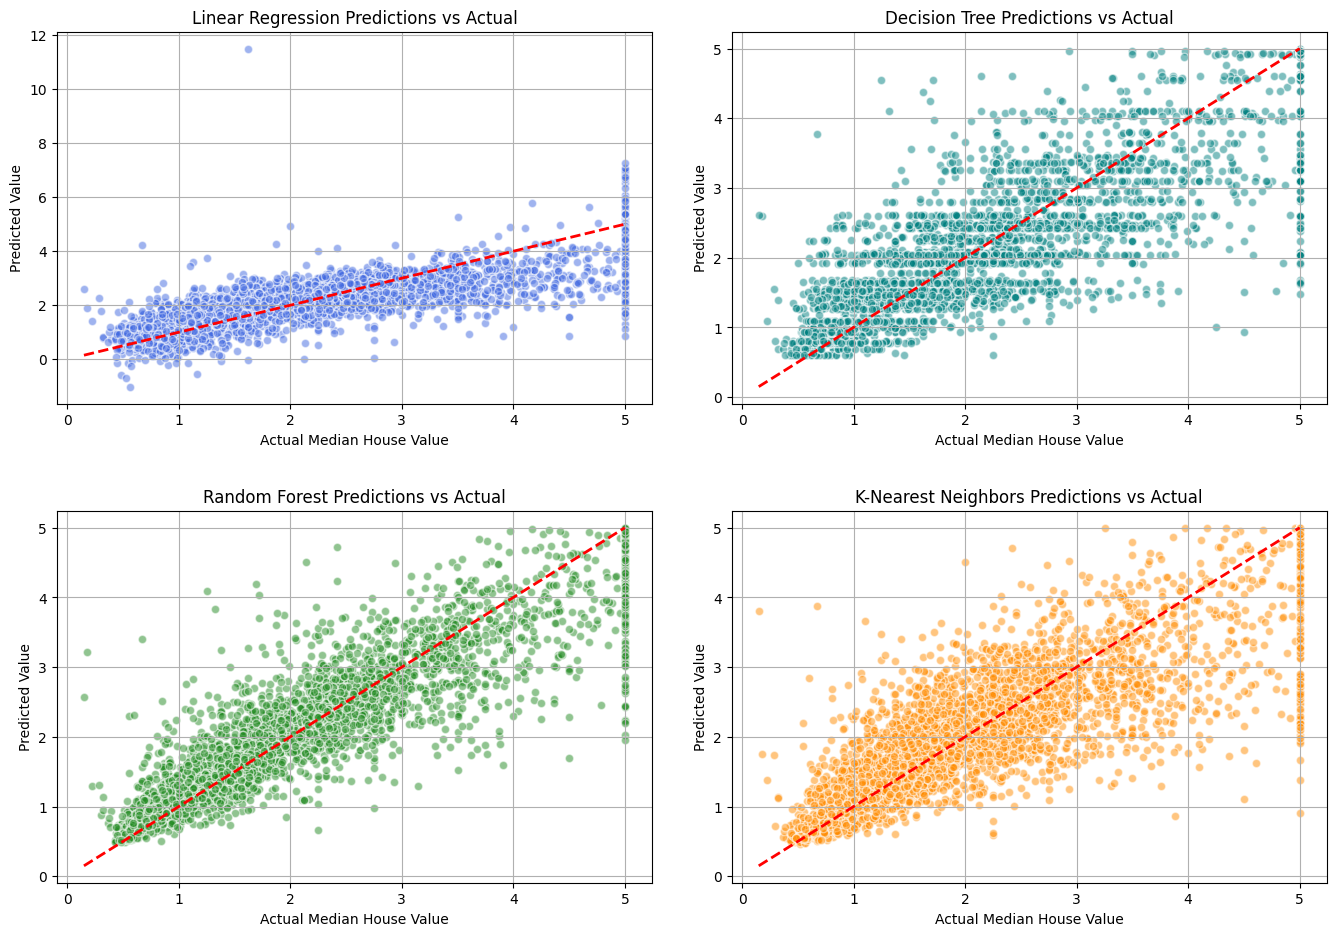

In [36]:
# Create subplots for side-by-side comparison
plt.figure(figsize=(14, 10))

# --- Linear Regression ---
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='royalblue', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Linear Regression Predictions vs Actual")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.grid(True)

# --- Decision Tree ---
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='teal', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Decision Tree Predictions vs Actual")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.grid(True)

# --- Random Forest ---
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='forestgreen', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.grid(True)

# --- K-Nearest Neighbors ---
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='darkorange', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("K-Nearest Neighbors Predictions vs Actual")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.grid(True)

# Adjust spacing to prevent overlap
plt.tight_layout(pad=3.0)
plt.show()


# **Summary**

The Random Forest Model performed the best among all four because its predictions were closest to the actual house values. Linear Regression did an okay performance but couldn't handle complex patterns well. The Decision Tree did better but sometimes overfitted while K-Nearest Neighbors was decent but senistive to settings. Some challenges I faced were adjusting the model parameters, making sure the data was processed properly and comparing the results fairly between models.